In [29]:
import sqlite3
import numpy as np
import tensorflow as tf
from tensorflow import keras as k
import matplotlib.pyplot as plt

In [4]:
print(tf.test.is_gpu_available())
print(tf.test.is_built_with_cuda())

Instructions for updating:
Use `tf.config.list_physical_devices('GPU')` instead.
True
True


In [5]:
conn = sqlite3.connect("DATAn.db")
cur = conn.cursor()
cur.execute("SELECT * FROM Negative")
rows_negative = cur.fetchall()
cur.execute("SELECT * FROM Positive")
rows_positive = cur.fetchall()


In [7]:
input_data = []
output_data = []

for i in range(0, len(rows_positive)):
    input_data.append(list(rows_positive[i]))
    output_data.append([1, 0])
    input_data.append(list(rows_negative[i]))
    output_data.append([0, 1])
    
input_data = np.array(input_data)
    
output_data = np.array(output_data)

In [8]:
print(len(rows_positive))
print(len(rows_negative))

139568
146699


In [9]:
train_x = input_data[:260000]
train_y = output_data[:260000]
test_x = input_data[261000:]
test_y = output_data[261000:]

In [27]:
model = k.Sequential()
model.add(k.layers.Dense(64, input_shape=(9,), activation="relu"))
model.add(k.layers.Dense(32, activation="relu"))
model.add(k.layers.Dense(16, activation="relu"))
model.add(k.layers.Dense(2, activation="sigmoid"))
model.compile(loss="mse", optimizer="adam", metrics="accuracy")
fit_results = model.fit(x=train_x, y=train_y, epochs=100, validation_split=0.20)

Epoch 1/100
6500/6500 [==============================] - 28s 4ms/step - loss: 0.2500 - accuracy: 0.4990 - val_loss: 0.2500 - val_accuracy: 0.5001
Epoch 2/100
6500/6500 [==============================] - 38s 6ms/step - loss: 0.2497 - accuracy: 0.5014 - val_loss: 0.2500 - val_accuracy: 0.5002
Epoch 3/100
6500/6500 [==============================] - 44s 7ms/step - loss: 0.2491 - accuracy: 0.5095 - val_loss: 0.2508 - val_accuracy: 0.4485
Epoch 4/100
6500/6500 [==============================] - 44s 7ms/step - loss: 0.2473 - accuracy: 0.5360 - val_loss: 0.2540 - val_accuracy: 0.4538
Epoch 5/100
6500/6500 [==============================] - 34s 5ms/step - loss: 0.2391 - accuracy: 0.5846 - val_loss: 0.2679 - val_accuracy: 0.4582
Epoch 6/100
6500/6500 [==============================] - 25s 4ms/step - loss: 0.2257 - accuracy: 0.6314 - val_loss: 0.2506 - val_accuracy: 0.5508
Epoch 7/100
6500/6500 [==============================] - 25s 4ms/step - loss: 0.2085 - accuracy: 0.6850 - val_loss: 0.2253 -

Epoch 57/100
6500/6500 [==============================] - 26s 4ms/step - loss: 0.0518 - accuracy: 0.9319 - val_loss: 0.0357 - val_accuracy: 0.9571
Epoch 58/100
6500/6500 [==============================] - 26s 4ms/step - loss: 0.0510 - accuracy: 0.9330 - val_loss: 0.0542 - val_accuracy: 0.9262
Epoch 59/100
6500/6500 [==============================] - 27s 4ms/step - loss: 0.0508 - accuracy: 0.9333 - val_loss: 0.0558 - val_accuracy: 0.9269
Epoch 60/100
6500/6500 [==============================] - 26s 4ms/step - loss: 0.0490 - accuracy: 0.9362 - val_loss: 0.0362 - val_accuracy: 0.9537
Epoch 61/100
6500/6500 [==============================] - 27s 4ms/step - loss: 0.0494 - accuracy: 0.9348 - val_loss: 0.0495 - val_accuracy: 0.9131
Epoch 62/100
6500/6500 [==============================] - 27s 4ms/step - loss: 0.0476 - accuracy: 0.9380 - val_loss: 0.0992 - val_accuracy: 0.8729
Epoch 63/100
6500/6500 [==============================] - 26s 4ms/step - loss: 0.0481 - accuracy: 0.9367 - val_loss: 0

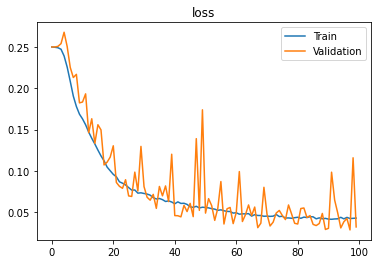

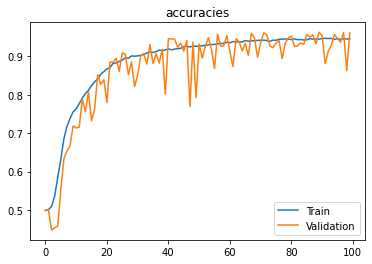

In [31]:
plt.title("loss")
plt.plot(fit_results.history["loss"], label="Train")
plt.plot(fit_results.history["val_loss"], label="Validation")
plt.legend()
plt.show()

plt.title("accuracies")
plt.plot(fit_results.history["accuracy"], label="Train")
plt.plot(fit_results.history["val_accuracy"], label="Validation")
plt.legend()
plt.show()

In [59]:
output_data_test = []
for i in range(0,6000):
    output_data_test.append([1, 0])
results = model.evaluate(rows_positive[130000:136000],output_data_test)
print(results)

188/188 [==============================] - 1s 3ms/step - loss: 0.0301 - accuracy: 0.9922
[0.030114613473415375, 0.9921666383743286]


In [41]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk
